In [609]:
import pandas as pd
import lasio
import numpy as np
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import arange, linspace
from matplotlib.patches import Patch

In [610]:
df = lasio.read(r'C:\Users\albin\Downloads\10703R.las', engine = 'normal').df()

In [611]:
df.reset_index(inplace = True)

In [612]:
df

,DEPT,BK,DS,DT,DT_ISH,DTM,GGKP,GGKP_ISH,GGKPM,GK,...,GZ4,GZ5,IK,MBK,MGZ,MPZ,NKTB,OGZ,PS,PZ
0,1.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.757,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.767,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.739,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.134,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.763,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24398,2441.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,4.305,NaN,NaN,NaN
24399,2441.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,4.334,NaN,NaN,NaN
24400,2441.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,4.243,NaN,NaN,NaN
24401,2441.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,4.304,NaN,NaN,NaN


In [616]:
data = df[(df.DEPT > 2275.0) & (df.DEPT < 2380.8)]

In [617]:
data.columns

Index(['DEPT', 'BK', 'DS', 'DT', 'DT_ISH', 'DTM', 'GGKP', 'GGKP_ISH', 'GGKPM',
       'GK', 'GZ1', 'GZ2', 'GZ3', 'GZ4', 'GZ5', 'IK', 'MBK', 'MGZ', 'MPZ',
       'NKTB', 'OGZ', 'PS', 'PZ'],
      dtype='object')

In [618]:
data = data.astype(float)

In [628]:
data.loc[((abs(data['NKTB']-data['NKTB'].mean()))>=3), ['Lith']]=70000 #известняк
data.loc[(data['MPZ']>data['MGZ']) & (abs(data['NKTB']-5.32)<2.8), ['Lith']]=30000 #песчаник
data.loc[((abs(data['GGKP']-data['GGKP'].mean()))>=0.3), ['Lith']]=90000 #уголь
data.fillna(65030, inplace = True)
data

,DEPT,BK,DS,DT,DT_ISH,DTM,GGKP,GGKP_ISH,GGKPM,GK,...,IK,MBK,MGZ,MPZ,NKTB,OGZ,PS,PZ,Lith,Plast
22733,2275.1,2.17,0.219,268.848,264.848,268.747,2.793,2.793,2.734,8.688,...,282.0,2.03,3.010,2.18,3.484,9.64,64.646,3.64,90000.0,2.0
22734,2275.2,2.05,0.217,269.960,265.960,269.338,2.781,2.781,2.739,7.730,...,280.0,2.16,2.617,2.48,3.762,11.60,64.646,3.90,90000.0,2.0
22735,2275.3,2.83,0.210,270.455,266.455,269.678,2.726,2.726,2.720,6.997,...,267.0,2.79,3.665,3.77,4.120,13.55,64.646,4.19,30000.0,2.0
22736,2275.4,3.61,0.207,270.563,266.563,270.018,2.699,2.699,2.701,6.387,...,242.0,4.52,4.357,5.06,4.354,14.30,64.646,4.58,30000.0,2.0
22737,2275.5,5.58,0.207,270.198,266.198,270.016,2.673,2.673,2.695,5.744,...,206.0,6.00,4.247,5.00,4.466,15.50,63.141,5.29,30000.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23785,2380.3,11.78,0.216,262.825,258.825,262.460,2.545,2.545,2.516,7.627,...,104.0,9.66,12.124,8.29,6.182,5.89,98.413,15.27,65030.0,6.0
23786,2380.4,11.55,0.216,263.629,259.629,262.995,2.524,2.524,2.511,7.194,...,109.0,11.25,12.753,9.46,5.914,6.06,98.413,14.25,65030.0,6.0
23787,2380.5,11.55,0.216,263.896,259.896,263.507,2.518,2.518,2.486,6.807,...,112.0,12.50,15.656,10.04,5.421,5.76,98.263,12.62,65030.0,6.0
23788,2380.6,11.55,0.215,263.713,259.713,264.019,2.466,2.466,2.462,6.866,...,114.0,12.00,17.148,17.44,4.852,5.08,98.263,10.82,30000.0,6.0


In [629]:
data.loc[(df['DEPT']>=2275.0) & (df['DEPT']<2293.3), ['Plast']]=2
data.loc[(df['DEPT']>=2293.3) & (df['DEPT']<2315.2), ['Plast']]=3
data.loc[(df['DEPT']>=2315.2) & (df['DEPT']<2335.0), ['Plast']]=4
data.loc[(df['DEPT']>=2335.0) & (df['DEPT']<2358.8), ['Plast']]=5
data.loc[(df['DEPT']>=2358.8) & (df['DEPT']<=2380.8), ['Plast']]=6
data

,DEPT,BK,DS,DT,DT_ISH,DTM,GGKP,GGKP_ISH,GGKPM,GK,...,IK,MBK,MGZ,MPZ,NKTB,OGZ,PS,PZ,Lith,Plast
22733,2275.1,2.17,0.219,268.848,264.848,268.747,2.793,2.793,2.734,8.688,...,282.0,2.03,3.010,2.18,3.484,9.64,64.646,3.64,90000.0,2.0
22734,2275.2,2.05,0.217,269.960,265.960,269.338,2.781,2.781,2.739,7.730,...,280.0,2.16,2.617,2.48,3.762,11.60,64.646,3.90,90000.0,2.0
22735,2275.3,2.83,0.210,270.455,266.455,269.678,2.726,2.726,2.720,6.997,...,267.0,2.79,3.665,3.77,4.120,13.55,64.646,4.19,30000.0,2.0
22736,2275.4,3.61,0.207,270.563,266.563,270.018,2.699,2.699,2.701,6.387,...,242.0,4.52,4.357,5.06,4.354,14.30,64.646,4.58,30000.0,2.0
22737,2275.5,5.58,0.207,270.198,266.198,270.016,2.673,2.673,2.695,5.744,...,206.0,6.00,4.247,5.00,4.466,15.50,63.141,5.29,30000.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23785,2380.3,11.78,0.216,262.825,258.825,262.460,2.545,2.545,2.516,7.627,...,104.0,9.66,12.124,8.29,6.182,5.89,98.413,15.27,65030.0,6.0
23786,2380.4,11.55,0.216,263.629,259.629,262.995,2.524,2.524,2.511,7.194,...,109.0,11.25,12.753,9.46,5.914,6.06,98.413,14.25,65030.0,6.0
23787,2380.5,11.55,0.216,263.896,259.896,263.507,2.518,2.518,2.486,6.807,...,112.0,12.50,15.656,10.04,5.421,5.76,98.263,12.62,65030.0,6.0
23788,2380.6,11.55,0.215,263.713,259.713,264.019,2.466,2.466,2.462,6.866,...,114.0,12.00,17.148,17.44,4.852,5.08,98.263,10.82,30000.0,6.0


In [422]:

data = data.drop(columns = ['Plast'])

In [630]:
lithology_numbers_ = {30000: {'lith':'Sandstone', 'lith_num':1, 'hatch': '..', 'color':'yellow'},
                       65030: {'lith':'Sandstone/Shale', 'lith_num':2, 'hatch':'-.', 'color':'grey'},
                    70000: {'lith':'Limestone', 'lith_num':6, 'hatch':'+', 'color':'blue'},
                      90000: {'lith':'Coal', 'lith_num':4, 'hatch':'', 'color':'black'},
                    }

In [631]:

df_lith = pd.DataFrame.from_dict(lithology_numbers, orient='index')
df_lith.index.name = 'LITHOLOGY'
df_lith

,lith,lith_num,hatch,color
LITHOLOGY,,,,
30000,Песчаник,1,..,#ffff00
65030,Sandstone/Shale,2,-.,#7cfc00
70000,Limestone,6,+,#80ffff
90000,Уголь,4,,black


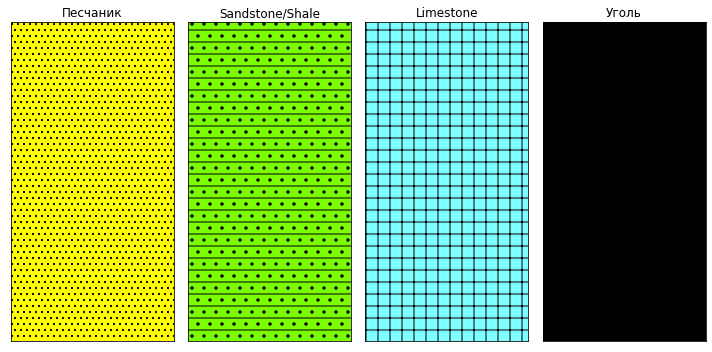

In [632]:

y = [0, 1]
x = [1, 1]

fig, axes = plt.subplots(ncols=4,nrows=1, sharex=True, sharey=True,
                         figsize=(10,5), subplot_kw={'xticks': [], 'yticks': []})

for ax, key in zip(axes.flat, lithology_numbers.keys()):
    ax.plot(x, y)
    ax.fill_betweenx(y, 0, 1, facecolor=lithology_numbers[key]['color'], hatch=lithology_numbers[key]['hatch'])
    ax.set_xlim(0, 0.1)
    ax.set_ylim(0, 1)
    ax.set_title(str(lithology_numbers[key]['lith']))

plt.tight_layout()
plt.show()

In [633]:
data_2=data[['DEPT', 'BK', 'DS', 'DT_ISH', 'GGKP', 'GK', 'GZ1', 'GZ2', 'GZ3', 'GZ4', 'GZ5', 'IK', 'MBK', 'MGZ', 'MPZ', 'NKTB',
               'PS', 'Plast', 'Lith']]
data_2

,DEPT,BK,DS,DT_ISH,GGKP,GK,GZ1,GZ2,GZ3,GZ4,GZ5,IK,MBK,MGZ,MPZ,NKTB,PS,Plast,Lith
22733,2275.1,2.17,0.219,264.848,2.793,8.688,1.69,1.91,2.32,1.24,1.31,282.0,2.03,3.010,2.18,3.484,64.646,2.0,90000.0
22734,2275.2,2.05,0.217,265.960,2.781,7.730,1.76,2.28,2.22,1.42,1.41,280.0,2.16,2.617,2.48,3.762,64.646,2.0,90000.0
22735,2275.3,2.83,0.210,266.455,2.726,6.997,2.13,2.57,2.49,1.61,1.49,267.0,2.79,3.665,3.77,4.120,64.646,2.0,30000.0
22736,2275.4,3.61,0.207,266.563,2.699,6.387,2.87,3.05,3.15,1.78,1.59,242.0,4.52,4.357,5.06,4.354,64.646,2.0,30000.0
22737,2275.5,5.58,0.207,266.198,2.673,5.744,4.38,3.51,3.71,2.13,1.74,206.0,6.00,4.247,5.00,4.466,63.141,2.0,30000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23785,2380.3,11.78,0.216,258.825,2.545,7.627,15.98,25.96,17.97,4.66,4.42,104.0,9.66,12.124,8.29,6.182,98.413,6.0,65030.0
23786,2380.4,11.55,0.216,259.629,2.524,7.194,18.19,25.33,19.08,5.45,4.26,109.0,11.25,12.753,9.46,5.914,98.413,6.0,65030.0
23787,2380.5,11.55,0.216,259.896,2.518,6.807,17.18,23.34,20.30,6.12,4.01,112.0,12.50,15.656,10.04,5.421,98.263,6.0,65030.0
23788,2380.6,11.55,0.215,259.713,2.466,6.866,13.69,17.79,20.50,6.47,3.75,114.0,12.00,17.148,17.44,4.852,98.263,6.0,30000.0


In [634]:
plast_numbers={2:{'Plast':'Ю2', 'color':'#ffff00'}, 
               3:{'Plast':'Ю3', 'color':'#ffe119'}, 
               4:{'Plast':'Ю4', 'color':'#bebebe'}, 
               5:{'Plast':'Ю5', 'color':'#80ffff'}, 
               6:{'Plast':'Ю6', 'color':'#8080ff'}}

In [635]:
#fig, axes = plt.subplots(figsize = (20,20))
curves_names = data_2.columns.values.tolist()[1:]
print(curves_names)
curves_names.append('stratigr')
curves_names.append('litho')

['BK', 'DS', 'DT_ISH', 'GGKP', 'GK', 'GZ1', 'GZ2', 'GZ3', 'GZ4', 'GZ5', 'IK', 'MBK', 'MGZ', 'MPZ', 'NKTB', 'PS', 'Plast', 'Lith']


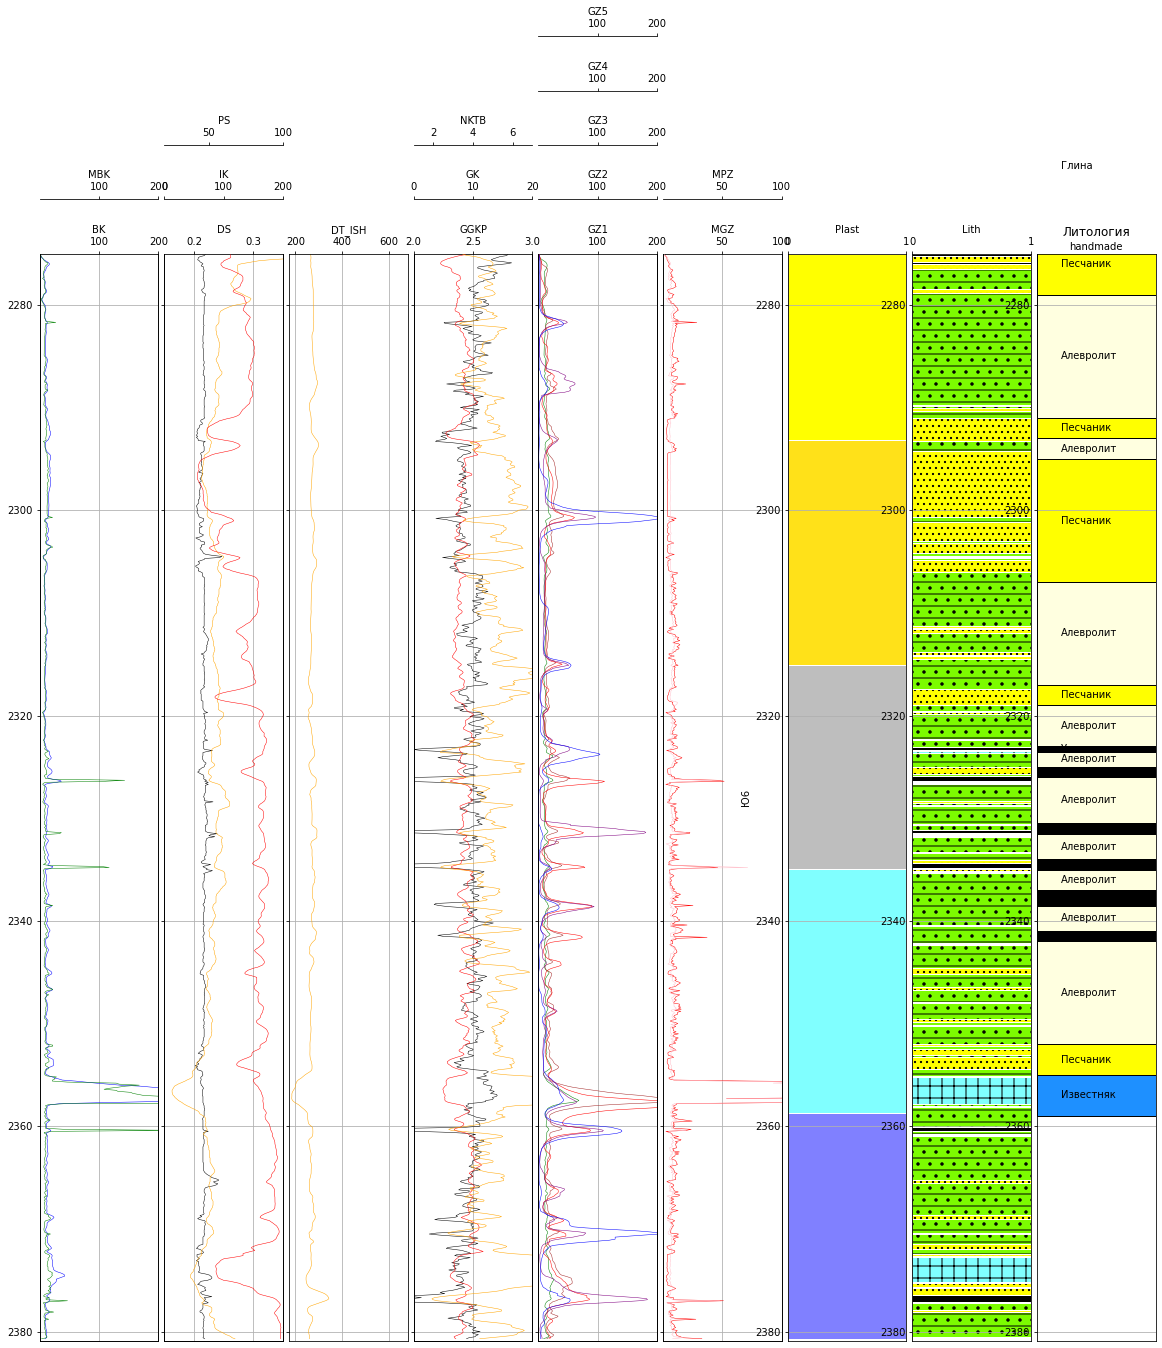

In [636]:
fig, axes = plt.subplots(figsize=(20, 20))

curve_names = ['BK', 'DS', 'DT_ISH', 'GGKP', 'GK', 'GZ1', 'GZ2', 'GZ3', 'GZ4', 'GZ5', 'IK', 'MBK', 'MGZ', 'MPZ', 'NKTB',
               'PS', 'Plast', 'Lith', 'handmade']

ax1=plt.subplot2grid((1, 9), (0, 0), rowspan=1, colspan=1) #BK
ax2=plt.subplot2grid((1, 9), (0, 1), rowspan=1, colspan=1) #DS
ax3=plt.subplot2grid((1, 9), (0, 2), rowspan=1, colspan=1) #DT_ISH
ax4=plt.subplot2grid((1, 9), (0, 3), rowspan=1, colspan=1) #GGKP
ax5=ax4.twiny() #GK
ax6=plt.subplot2grid((1, 9), (0, 4), rowspan=1, colspan=1) #GZ1
ax7=ax6.twiny()#GZ2
ax8=ax7.twiny()#GZ3
ax9=ax8.twiny()#GZ4
ax10=ax9.twiny()#GZ5
ax11=ax2.twiny()#IK
ax12=ax1.twiny()#MBK
ax13=plt.subplot2grid((1, 9), (0, 5), rowspan=1, colspan=1)#MGZ
ax14=ax13.twiny()#MPZ
ax15=ax5.twiny()#NKTB
ax16=ax11.twiny()#PS
ax17=plt.subplot2grid((1, 9), (0, 6), rowspan=1, colspan=1)#Plast
ax18=plt.subplot2grid((1, 9), (0, 7), rowspan=1, colspan=1)#Lith
ax19=plt.subplot2grid((1, 9), (0, 8), rowspan=1, colspan=1)#Lith

ax1.plot(data_2['BK'], data_2['DEPT'], color="blue", lw=0.5)
ax1.set_xlim(0.2, 200)

ax2.plot("DS", "DEPT", data=data_2, color="black", lw=0.5)
ax2.set_xlim(0.15, 0.35)

ax3.plot("DT_ISH", "DEPT", data=data_2, color="orange", lw=0.5)
ax3.set_xlim(172.56, 680.74)

ax4.plot(data['GGKP'], data['DEPT'], color="black", lw=0.5)
ax4.set_xlim(2, 3)

ax5.plot("GK", "DEPT", data=data_2, color="red", lw=0.5)
ax5.set_xlim(0, 20)

ax6.plot("GZ1", "DEPT", data=data_2, color="green", lw=0.5)
ax6.set_xlim(0.2, 200)

ax7.plot("GZ2", "DEPT", data=data_2, color="brown", lw=0.5)
ax7.set_xlim(0.2, 200)

ax8.plot("GZ3", "DEPT", data=data_2, color="red", lw=0.5)
ax8.set_xlim(0.2, 200)

ax9.plot("GZ4", "DEPT", data=data_2, color="purple", lw=0.5)
ax9.set_xlim(0.2, 200)

ax10.plot("GZ5", "DEPT", data=data_2, color="blue", lw=0.5)
ax10.set_xlim(0.2, 200)

ax11.plot("IK", "DEPT", data=data_2, color="orange", lw=0.5)
ax11.set_xlim(0, 200)

ax12.plot("MBK", "DEPT", data=data_2, color="green", lw=0.5)
ax12.set_xlim(0.2, 200)

ax13.plot("MGZ", "DEPT", data=data_2, color="red", lw=0.5)
ax13.set_xlim(1, 100)

ax14.plot("MPZ", "DEPT", data=data_2, color="pink", lw=0.5)
ax14.set_xlim(1, 100)

ax15.plot(data_2['NKTB'], data_2['DEPT'], color="orange", lw=0.5)
ax15.set_xlim(1, 7)

ax16.plot("PS", "DEPT", data=data_2, color="red", lw=0.5)
ax16.set_xlim(20, 100)

ax17.plot(data_2["Plast"], data_2['DEPT'], color = "black", linewidth = 0.5)
ax17.set_xlabel("Plast")
ax17.set_xlim(0, 1)
ax17.xaxis.label.set_color("black")
ax17.tick_params(axis='x', colors="black")
ax17.spines["top"].set_edgecolor("black")

for key in plast_numbers.keys():
    color = plast_numbers[key]['color']
    ax17.set_ylabel(str(plast_numbers[key]['Plast']))
    ax17.fill_betweenx(data_2['DEPT'], 0, data_2['Plast'], where=(data_2['Plast']==key),
                         facecolor=color)
ax17.set_xticks([0, 1])

ax18.plot(data_2['Lith'], data_2['DEPT'], color = "black", linewidth = 0.5)
ax18.set_xlabel("Lith")
ax18.set_xlim(0, 1)
ax18.xaxis.label.set_color("black")
ax18.tick_params(axis='x', colors="black")
ax18.spines["top"].set_edgecolor("black")

for key in lithology_numbers.keys():
    color = lithology_numbers[key]['color']
    hatch = lithology_numbers[key]['hatch']
    ax18.fill_betweenx(data_2['DEPT'], 0, data_2['Lith'], where=(data_2['Lith']==key),
                         facecolor=color, hatch=hatch)
ax18.set_xticks([0, 1])

for i, ax in enumerate(fig.axes):
    ax.set_ylim(2380.9, 2275.0)
    
    ax.xaxis.set_ticks_position("top")
    ax.xaxis.set_label_position("top")
    ax.set_xlabel(curve_names[i])
    
    if i==11 or i==10 or i==4 or i==6 or i==13:
        ax.spines["top"].set_position(("axes", 1.05))
    elif i==15 or i==14 or i==7:
        ax.spines["top"].set_position(("axes", 1.10))
    elif i==8:
        ax.spines["top"].set_position(("axes", 1.15))
    elif i==9:
        ax.spines["top"].set_position(("axes", 1.20))
    else:
        ax.grid()
        
for ax in [ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10, ax11, ax12, ax13, ax14, ax15, ax16]:
    plt.setp(ax.get_yticklabels(), visible=False)
    
ax19.set_xlim(0,1)
ax19.set_xticks([])
ax19.invert_yaxis()
ax19.title.set_text('Литология')

lithology_colors_ = {'Глина':'blue',
                   'Известняк':'dodgerblue',
                   'Песчаник':'yellow',
                   'Алевролит':'lightyellow',
                   'Уголь':'black'}


for top, bottom, litho in LITH.values:
    ax19.axhspan(top, bottom, facecolor = lithology_colors_.get(litho), edgecolor = 'k')
    ax19.invert_yaxis()
    
label_depth = []
for top, bottom in lith_.values:
    l = ((bottom - top)/2) + top
    label_depth.append(l)
    
label = ['Глина','Песчаник', 'Алевролит','Песчаник','Алевролит','Песчаник','Алевролит','Песчаник', 'Алевролит', 'Уголь','Алевролит', 'Уголь','Алевролит','Уголь', 'Алевролит', 'Уголь', 'Алевролит', 'Уголь', 'Алевролит', 'Уголь', 'Алевролит', 'Песчаник', 'Известняк']
for depth, label in zip(label_depth, label):
    ax19.text(0.2, depth, label, verticalalignment = 'center')
    
fig.subplots_adjust(wspace=0.05)

In [645]:
dictdk = {
    'ZK': [2273,2279,2291,2293,2295, 2307, 2317, 2319, 2323, 2323.5, 2325, 2326,  2330.5, 2331.5, 2334,2335,2337,2338.5, 2341,2342,2352, 2355],
    'ZP': [2279,2291,2293, 2295, 2307, 2317, 2319, 2323, 2323.5, 2325, 2326, 2330.5, 2331.5, 2334, 2335,2337,2338.5, 2341,2342, 2352, 2355, 2359]
}
LITH['litho'] = ['Глина','Песчаник', 'Алевролит','Песчаник','Алевролит','Песчаник','Алевролит','Песчаник', 'Алевролит', 'Уголь','Алевролит', 'Уголь','Алевролит','Уголь', 'Алевролит', 'Уголь', 'Алевролит', 'Уголь', 'Алевролит', 'Уголь', 'Алевролит', 'Песчаник', 'Известняк']

In [642]:
lith_ = LITH.drop(columns = ['litho'])

In [604]:
df.describe()

,DEPT,BK,DS,DT,DT_ISH,DTM,GGKP,GGKP_ISH,GGKPM,GK,...,GZ4,GZ5,IK,MBK,MGZ,MPZ,NKTB,OGZ,PS,PZ
count,24403.000000,4246.000000,19544.000000,19379.000000,19379.000000,19385.000000,2406.000000,2406.000000,2407.000000,24388.000000,...,2348.000000,2348.000000,2396.000000,2452.000000,2452.000000,2452.000000,24099.000000,2348.000000,19535.000000,19535.000000
mean,1221.900000,9.731001,0.232902,391.300422,387.300421,388.788447,2.405968,2.405968,2.417447,7.413667,...,13.675784,12.104655,129.226628,15.027875,11.341311,10.279670,2.646016,17.024962,71.017171,5.743748
std,704.468365,20.933583,0.021436,90.265763,90.265763,85.856313,0.208952,0.208952,0.175835,3.243087,...,20.410566,21.530340,84.764884,52.698328,31.530182,38.851114,1.399575,24.781859,15.489082,7.879282
min,1.800000,0.000000,0.194000,172.562000,168.562000,173.754000,1.479000,1.479000,1.904000,2.039000,...,0.950000,0.250000,13.000000,1.830000,1.907000,1.920000,0.770000,0.320000,0.239000,0.020000
25%,611.850000,4.220000,0.216000,335.048000,331.048000,334.858000,2.285000,2.285000,2.299000,5.225750,...,3.880000,3.010000,79.000000,4.690000,4.549000,4.320000,1.766000,5.475000,65.129000,2.950000
50%,1221.900000,4.910000,0.226000,363.294000,359.294000,362.286000,2.442000,2.442000,2.435000,7.931000,...,6.950000,5.290000,96.000000,7.880000,6.507000,6.600000,2.542000,9.790000,77.364000,4.410000
75%,1831.950000,10.530000,0.246000,434.020000,430.020000,432.997000,2.540000,2.540000,2.533000,8.758250,...,11.860000,11.862500,163.250000,10.330000,10.503500,8.252500,3.118000,16.167500,78.708000,5.370000
max,2442.000000,382.830000,0.392000,680.736000,676.736000,626.826000,2.921000,2.921000,2.872000,50.023000,...,183.830000,203.030000,548.000000,787.950000,565.431000,847.900000,23.731000,218.260000,107.459000,131.620000


In [605]:
data = pd.read_csv(r'C:\Users\albin\Downloads\10703_stratigrafia.csv', sep = ',')
data.drop(columns = ['WELL'])
dat = data[['ZK','ZP','ZONENAME']]
dot = dat.copy()
dot.drop(columns = 'ZONENAME')
dat

,ZK,ZP,ZONENAME
0,2275.0,2293.3,Ю2
1,2293.3,2315.2,Ю3
2,2315.2,2335.0,Ю4
3,2335.0,2358.8,Ю5
4,2358.8,2380.8,Ю6


In [606]:
dit = pd.DataFrame([2275.0,2293.3,2315.2,2335])

In [607]:
dictdk = {
    'ZK': [2260,2273,2279,2291,2293,2295, 2307, 2317, 2319, 2323, 2323.5, 2325, 2326,  2330.5, 2331.5, 2334,2335,2337,2338.5, 2341,2342,2352, 2355],
    'ZP': [2273,2279,2291,2293, 2295, 2307, 2317, 2319, 2323, 2323.5, 2325, 2326, 2330.5, 2331.5, 2334, 2335,2337,2338.5, 2341,2342, 2352, 2355, 2359]
}

In [502]:
LITH = pd.DataFrame(dictdk)

In [16]:
LITH['litho'] = ['Глина','Песчаник', 'Алевролит','Песчаник','Алевролит','Песчаник','Алевролит','Песчаник', 'Алевролит', 'Уголь','Алевролит', 'Уголь','Алевролит','Уголь', 'Алевролит', 'Уголь', 'Алевролит', 'Уголь', 'Алевролит', 'Уголь', 'Алевролит', 'Песчаник', 'Известняк']

In [17]:
LITH 

,ZK,ZP,litho
0,2260.0,2273.0,Глина
1,2273.0,2279.0,Песчаник
2,2279.0,2291.0,Алевролит
3,2291.0,2293.0,Песчаник
4,2293.0,2295.0,Алевролит
5,2295.0,2307.0,Песчаник
6,2307.0,2317.0,Алевролит
7,2317.0,2319.0,Песчаник
8,2319.0,2323.0,Алевролит
9,2323.0,2323.5,Уголь


In [18]:
lith_ = LITH.drop(columns = ['litho'])